**DATA**

In [ ]:
# This cell will authenticate you and mount your Drive in the Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [ ]:
!pip install --upgrade pyfluidsynth

  Preparing metadata (setup.py) ... done
  Created wheel for pyfluidsynth: filename=pyFluidSynth-1.3.3-py3-none-any.whl size=19185 sha256=30fbe1f021df8f706a77939a57f1805afeb64b56ff5df217086d814624df40d6
  Stored in directory: /root/.cache/pip/wheels/e6/9c/2b/b4b194cbb100d6f20136a22b2f76cd329b1a21139ed26c9775
Successfully built pyfluidsynth


In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=5caba315eb8300607a693e9885e9444b6c2f9959c198938747b67af4b14e6cd5
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [ ]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

59243107/59243107 [==============================] - 3s 0us/step


In [ ]:
filenames = glob.glob(str(data_dir/'**/*.mid*'))
print('Number of files:', len(filenames))

Number of files: 1282


**Import csv**

In [ ]:
file_data = pd.read_csv('/content/drive/MyDrive/210_capstone/RNN_Training/train_dataset.csv')

In [ ]:
file_data

,Unnamed: 0,msd_id,midi_id,match_score,midi_filename,lpd_filename,lyrics_filename,midi_end_time,midi_instruments,midi_program_numbers,...,song_title,artist,artist_terms,lyrics,album,year_released,bpm,genre,lyric_lang,topic
0,1775,TRWJFAT128F92DF5D0,53d461fed63115074d1f9384648289d0,0.726674,processed/lmd_matched/53d461fed63115074d1f9384...,processed/lpd_5_matched/53d461fed63115074d1f93...,processed/lyrics/53d461fed63115074d1f938464828...,171.201218,10,"[0, 35, 27, 1, 65, 25, 53, 0, 52, 27]",...,Yellow River,Christie,"['pop rock', 'soft rock', 'ballad', 'country r...",So long boy you'can take my place\ngot my pape...,The Pop Years 1970 - 1971,1970,130.404,blues,en-US,Dance
1,2695,TRAHRWJ12903CFACFF,7c5e20577d4751c238ca1609f23b2435,0.738171,processed/lmd_matched/7c5e20577d4751c238ca1609...,processed/lpd_5_matched/7c5e20577d4751c238ca16...,processed/lyrics/7c5e20577d4751c238ca1609f23b2...,238.266579,6,"[25, 0, 35, 24, 85, 53]",...,Unconditionally (Soul and R&B),Willie Clayton,"['chicago soul', 'chicago blues', 'soul blues'...",I was standing\nAll alone against the world o...,Changing Tha Game,0,141.992,blues,en-US,Dance
2,3470,TRBQURA128F9310FC2,9e1d04631b8ad65addff1a9f755132aa,0.710307,processed/lmd_matched/9e1d04631b8ad65addff1a9f...,processed/lpd_5_matched/9e1d04631b8ad65addff1a...,processed/lyrics/9e1d04631b8ad65addff1a9f75513...,185.803829,10,"[62, 25, 27, 0, 27, 35, 27, 30, 53, 0]",...,Mother's Little Helper,The Rolling Stones,"['blues', 'hard rock', 'rock', 'england', 'lon...",What a drag it is getting old.\nIt's so differ...,Aftermath (UK Version),1966,101.721,blues,en-US,Dance
3,906,TRSFCIR128F428CBE6,27431bcd13103d9bbeb8a03fea0393dc,0.748241,processed/lmd_matched/27431bcd13103d9bbeb8a03f...,processed/lpd_5_matched/27431bcd13103d9bbeb8a0...,processed/lyrics/27431bcd13103d9bbeb8a03fea039...,285.372656,8,"[0, 0, 65, 35, 50, 52, 49, 48]",...,It's One Of Those Nights (Yes Love),The Partridge Family,"['pop rock', 'soft rock', 'ballad', 'country r...","This Train Don't Stop There Anymore\nJohn, Elt...",The Definitive Collection,1993,97.173,blues,en-US,Dance
4,1752,TRKESVW128F42AA610,52dc589baea0c387807aa964094e0cba,0.751241,processed/lmd_matched/52dc589baea0c387807aa964...,processed/lpd_5_matched/52dc589baea0c387807aa9...,processed/lyrics/52dc589baea0c387807aa964094e0...,187.906484,11,"[1, 48, 13, 0, 35, 73, 4, 73, 29, 47, 75]",...,Baditude (Mark Mendes Remix),Spoon_ Harris & Obernik,"['pop rock', 'dance', 'electronica', 'slide', ...","I work all night, I work all\nday to pay the b...",Baditude,2008,126.971,blues,en-US,Dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,5284,TRRCGPH12903CCA021,ec46dd45657544776d1e0149a7691bfb,0.745649,processed/lmd_matched/ec46dd45657544776d1e0149...,processed/lpd_5_matched/ec46dd45657544776d1e01...,processed/lyrics/ec46dd45657544776d1e0149a7691...,291.487878,15,"[0, 12, 108, 35, 75, 45, 0, 24, 28, 84, 29, 4,...",...,Idu Bugari 4/4,Kawasaki 3P,"['ska', 'punk', 'croatian', 'croatian punk', '...",There's a little black spot on the sun today;\...,Idu Bugari,2009,174.201,soul r&b,en-US,Violence
4553,2784,TRZUMHK128F9334F40,7fbb949062ae0dc3ea464aa6c59f173b,0.746597,processed/lmd_matched/7fbb949062ae0dc3ea464aa6...,processed/lpd_5_matched/7fbb949062ae0dc3ea464a...,processed/lyrics/7fbb949062ae0dc3ea464aa6c59f1...,196.088542,15,"[0, 110, 110, 25, 0, 33, 17, 26, 27, 25, 27, 2...",...,She's The One,Blessid Union Of Souls,"['modern rock', 'easy listening', 'pop rock', ...","SIX LANES, TAIL LIGHTS\nRED ANTS MARCHIN'\nINT...",Close To The Edge,2005,156.079,soul r&b,en-US,Violence
4554,3006,TRRRNGS12903CD16D9,89c287bce7f330617e27c21ecc1861ab,0.643500,processed/lmd_matched/89c287bce7f330617e27c21e...,processed/lpd_5_matched/89c287bce7f330617e27c2...,processed/lyrics/89c287bce7f330617e27c21ecc186...,273.891372,17,"[22, 54, 33, 24, 25, 40, 48, 30, 5, 0, 0, 0, 0...",...,You're In My Heart,D2,"['video game music', 'pop rock', 'hard rock', ...",I didn't know what day

In [ ]:
file_data['midi_filename'][1]

'processed/lmd_matched/7c5e20577d4751c238ca1609f23b2435.mid'

**Process a MIDI file**

In [ ]:
sample_file = filenames[1]
print(sample_file)

data/maestro-v2.0.0/2008/MIDI-Unprocessed_02_R1_2008_01-05_ORIG_MID--AUDIO_02_R1_2008_wav--3.midi


In [ ]:
pm = pretty_midi.PrettyMIDI(sample_file)

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [ ]:
display_audio(pm)

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [ ]:
print('Number of instruments:', len(pm.instruments))



Number of instruments: 1


**Extract notes**

In [ ]:
sample_file1 = '/content/drive/MyDrive/210_capstone/149b62f7edc85d06346fafab4692e81b.mid'

pm = pretty_midi.PrettyMIDI(sample_file1)

instrument = pm.instruments[0]

for i, note in enumerate(instrument.notes):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=65, note_name=F4, duration=0.0307
1: pitch=65, note_name=F4, duration=0.0307
2: pitch=65, note_name=F4, duration=0.0307
3: pitch=65, note_name=F4, duration=0.0307
4: pitch=65, note_name=F4, duration=0.0307
5: pitch=65, note_name=F4, duration=0.0307
6: pitch=65, note_name=F4, duration=0.0307
7: pitch=65, note_name=F4, duration=0.0307
8: pitch=35, note_name=B1, duration=0.0307
9: pitch=35, note_name=B1, duration=0.0307
10: pitch=42, note_name=F#2, duration=0.0307
11: pitch=35, note_name=B1, duration=0.0307
12: pitch=42, note_name=F#2, duration=0.0307
13: pitch=35, note_name=B1, duration=0.0307
14: pitch=42, note_name=F#2, duration=0.0307
15: pitch=37, note_name=C#2, duration=0.0307
16: pitch=35, note_name=B1, duration=0.0307
17: pitch=42, note_name=F#2, duration=0.0307
18: pitch=35, note_name=B1, duration=0.0307
19: pitch=42, note_name=F#2, duration=0.0307
20: pitch=35, note_name=B1, duration=0.0307
21: pitch=42, note_name=F#2, duration=0.0307
22: pitch=35, note_name=B1, duratio

In [ ]:
sample_file = filenames[1]
print(sample_file)

data/maestro-v2.0.0/2008/MIDI-Unprocessed_02_R1_2008_01-05_ORIG_MID--AUDIO_02_R1_2008_wav--3.midi


In [ ]:
pm = pretty_midi.PrettyMIDI(sample_file)

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [ ]:
for i, note in enumerate(instrument.notes):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=65, note_name=F4, duration=0.1120
1: pitch=64, note_name=E4, duration=0.0911
2: pitch=62, note_name=D4, duration=0.0742
3: pitch=59, note_name=B3, duration=0.0482
4: pitch=56, note_name=G#3, duration=0.0299
5: pitch=59, note_name=B3, duration=0.0417
6: pitch=62, note_name=D4, duration=0.0508
7: pitch=64, note_name=E4, duration=0.0482
8: pitch=65, note_name=F4, duration=0.1016
9: pitch=64, note_name=E4, duration=0.0586
10: pitch=62, note_name=D4, duration=0.0573
11: pitch=59, note_name=B3, duration=0.0391
12: pitch=56, note_name=G#3, duration=0.0326
13: pitch=59, note_name=B3, duration=0.0339
14: pitch=62, note_name=D4, duration=0.0547
15: pitch=64, note_name=E4, duration=0.0521
16: pitch=65, note_name=F4, duration=0.0951
17: pitch=64, note_name=E4, duration=0.0534
18: pitch=62, note_name=D4, duration=0.0573
19: pitch=59, note_name=B3, duration=0.0482
20: pitch=65, note_name=F4, duration=0.0977
21: pitch=64, note_name=E4, duration=0.0690
22: pitch=62, note_name=D4, duration=0.0

In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=65, note_name=F4, duration=0.1120
1: pitch=64, note_name=E4, duration=0.0911
2: pitch=62, note_name=D4, duration=0.0742
3: pitch=59, note_name=B3, duration=0.0482
4: pitch=56, note_name=G#3, duration=0.0299
5: pitch=59, note_name=B3, duration=0.0417
6: pitch=62, note_name=D4, duration=0.0508
7: pitch=64, note_name=E4, duration=0.0482
8: pitch=65, note_name=F4, duration=0.1016
9: pitch=64, note_name=E4, duration=0.0586


In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,65,0.895833,1.007812,0.000000,0.111979
1,64,0.976562,1.067708,0.080729,0.091146
2,62,1.042969,1.117188,0.066406,0.074219
3,59,1.108073,1.156250,0.065104,0.048177
4,56,1.196615,1.226562,0.088542,0.029948


In [ ]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['F4', 'E4', 'D4', 'B3', 'G#3', 'B3', 'D4', 'E4', 'F4', 'E4'],
      dtype='<U3')

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

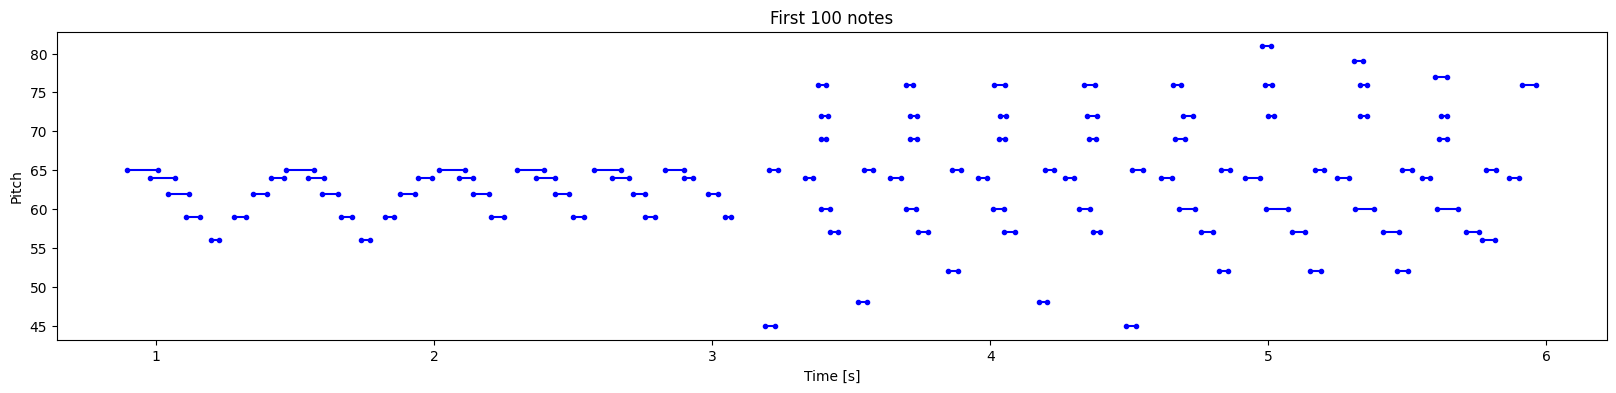

In [ ]:
plot_piano_roll(raw_notes, count=100)

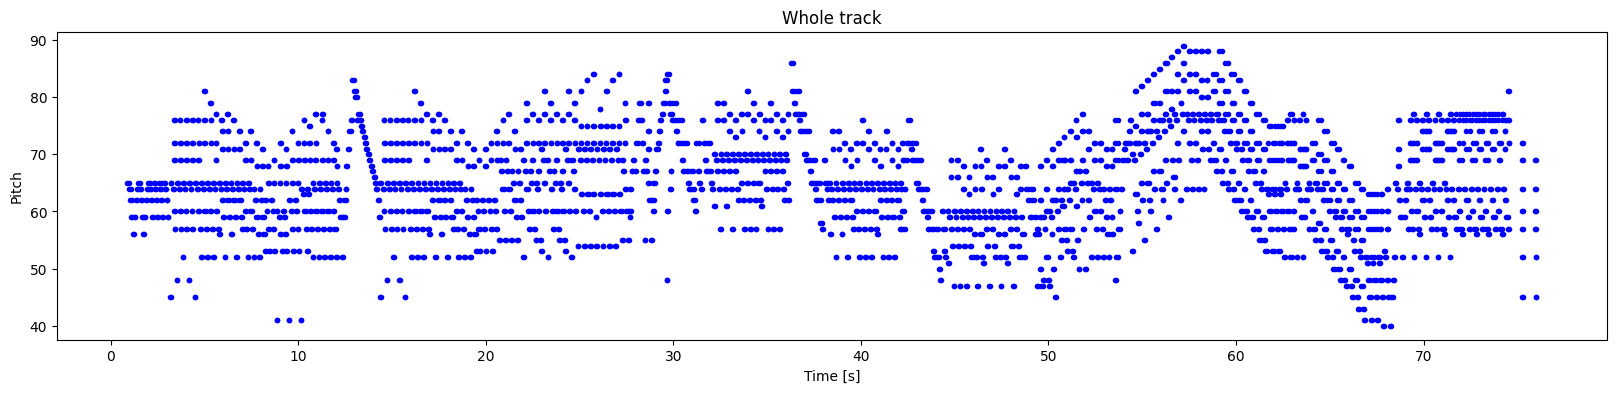

In [ ]:
plot_piano_roll(raw_notes)

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

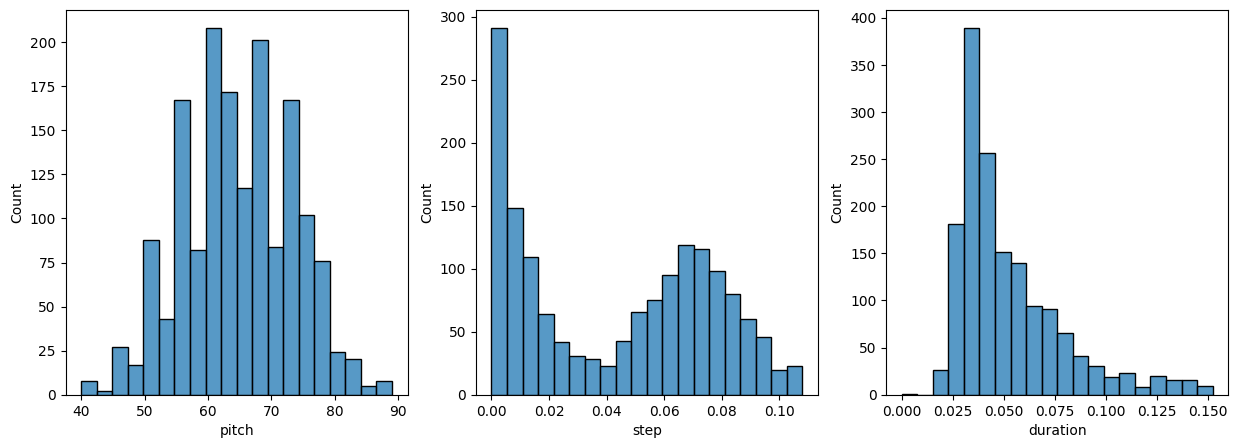

In [ ]:
plot_distributions(raw_notes)

**Create a MIDI file**

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

In [ ]:
display_audio(example_pm)

**Create the training dataset**

In [ ]:
num_files = 1
all_notes = []
for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)
all_notes

,pitch,start,end,step,duration
0,68,0.985677,1.161458,0.000000,0.175781
1,59,1.000000,1.614583,0.014323,0.614583
2,56,1.001302,1.365885,0.001302,0.364583
3,44,1.014323,1.436198,0.013021,0.421875
4,32,1.015625,1.403646,0.001302,0.388021
...,...,...,...,...,...
5999,92,664.330729,664.376302,0.001302,0.045573
6000,63,664.343750,664.450521,0.013021,0.106771
6001,72,664.345052,664.498698,0.001302,0.153646
6002,68,664.351562,664.502604,0.006510,0.151042


In [ ]:
# all_notes is the dataframe

type(all_notes)

pandas.core.frame.DataFrame

In [ ]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 6004


In [ ]:
# convert dataframe to the numpy.ndarray (train_notes)


key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [ ]:
type(train_notes)

numpy.ndarray

In [ ]:
# convert numpy.ndarray to TensorSpec (notes_ds)

notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [ ]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
# Function to create Sequences

def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}
    print("labels", labels)

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
seq_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})>

In [ ]:
# storing sequence (pitch, step , duration)

seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

labels {'pitch': <tf.Tensor 'strided_slice_2:0' shape=() dtype=float64>, 'step': <tf.Tensor 'strided_slice_3:0' shape=() dtype=float64>, 'duration': <tf.Tensor 'strided_slice_4:0' shape=() dtype=float64>}


(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [ ]:
seq_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})>

In [ ]:
type(seq_ds)

tensorflow.python.data.ops.map_op._ParallelMapDataset

In [ ]:
seq_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})>

In [ ]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[5.31250000e-01 0.00000000e+00 1.75781250e-01]
 [4.60937500e-01 1.43229167e-02 6.14583333e-01]
 [4.37500000e-01 1.30208333e-03 3.64583333e-01]
 [3.43750000e-01 1.30208333e-02 4.21875000e-01]
 [2.50000000e-01 1.30208333e-03 3.88020833e-01]
 [4.92187500e-01 1.41927083e-01 3.30729167e-01]
 [4.92187500e-01 8.60677083e-01 2.26822917e+00]
 [4.60937500e-01 9.11458333e-03 2.40104167e+00]
 [4.21875000e-01 2.60416667e-03 2.15364583e+00]
 [3.67187500e-01 1.56250000e-02 2.35026042e+00]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=83.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.20052083333333393>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.22916666666666607>}


In [ ]:
type(seq)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
seq_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})>

In [ ]:
seq_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})>

In [ ]:
# Training data

batch_size = 1
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(1, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(1,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(1,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(1,), dtype=tf.float64, name=None)})

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(1, 25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(1,), dtype=tf.float64, name=None)})>

**Create and train the model**

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [ ]:
seq_length

25

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)

inputs

<KerasTensor: shape=(None, 25, 3) dtype=float32 (created by layer 'input_40')>

In [ ]:
# Feeding input and Getting Output

input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_41 (InputLayer)       [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm_20 (LSTM)              (None, 128)                  67584     ['input_41[0][0]']            
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_20[0][0]']             
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm_20[0][0]']             
                                                                                           

In [ ]:
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_41 (InputLayer)       [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm_20 (LSTM)              (None, 128)                  67584     ['input_41[0][0]']            
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_20[0][0]']             
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm_20[0][0]']             
                                                                                           

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(1, 25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(1,), dtype=tf.float64, name=None)})>

In [ ]:
inputs

<KerasTensor: shape=(None, 25, 3) dtype=float32 (created by layer 'input_41')>

In [ ]:
outputs

{'pitch': <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'pitch')>,
 'step': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'step')>,
 'duration': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'duration')>}

In [ ]:
print(train_ds.element_spec)

(TensorSpec(shape=(1, 25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(1,), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(1,), dtype=tf.float64, name=None)})


In [ ]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

In [ ]:
losses = model.evaluate(train_ds, return_dict=True)
losses

5979/5979 [==============================] - 21s 3ms/step - loss: 0.7095 - duration_loss: 0.2281 - pitch_loss: 4.8526 - step_loss: 0.2389


{'loss': 0.7095434069633484,
 'duration_loss': 0.22806484997272491,
 'pitch_loss': 4.85255765914917,
 'step_loss': 0.2388516664505005}

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})>

In [ ]:
model.evaluate(train_ds, return_dict=True)

93/93 [==============================] - 1s 9ms/step - loss: 1.4952 - duration_loss: 0.5673 - pitch_loss: 4.8510 - step_loss: 0.6853


{'loss': 1.4951552152633667,
 'duration_loss': 0.5673152208328247,
 'pitch_loss': 4.850985527038574,
 'step_loss': 0.6852904558181763}

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})>

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
626/626 [==============================] - 43s 64ms/step - loss: 0.3041 - duration_loss: 0.0608 - pitch_loss: 4.1538 - step_loss: 0.0356
Epoch 2/50
626/626 [==============================] - 50s 79ms/step - loss: 0.2908 - duration_loss: 0.0583 - pitch_loss: 3.9936 - step_loss: 0.0328
Epoch 3/50
626/626 [==============================] - 29s 46ms/step - loss: 0.2856 - duration_loss: 0.0577 - pitch_loss: 3.9100 - step_loss: 0.0324
Epoch 4/50
626/626 [==============================] - 27s 43ms/step - loss: 0.2840 - duration_loss: 0.0574 - pitch_loss: 3.8899 - step_loss: 0.0321
Epoch 5/50
626/626 [==============================] - 28s 45ms/step - loss: 0.2829 - duration_loss: 0.0571 - pitch_loss: 3.8812 - step_loss: 0.0318
Epoch 6/50
626/626 [==============================] - 27s 43ms/step - loss: 0.2814 - duration_loss: 0.0566 - pitch_loss: 3.8685 - step_loss: 0.0314
Epoch 7/50
626/626 [==============================] - 27s 43ms/step - loss: 0.2788 - duration_loss: 0.0561 - pit

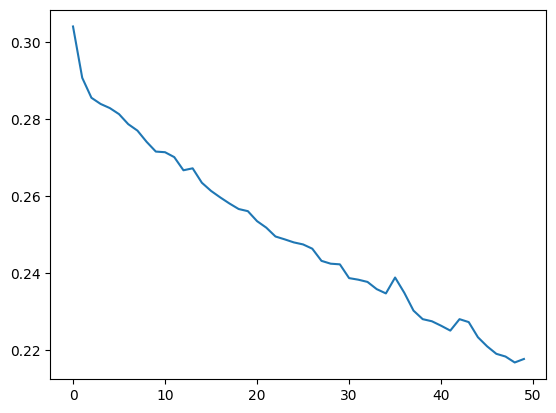

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

**Generate notes**

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [ ]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - 0s 22ms/step


In [ ]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - 0s 41ms/step


In [ ]:
!apt install fluidsynth
!pip install midi2audio


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0
  libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icc

In [ ]:
from midi2audio import FluidSynth
from IPython.display import Audio

# Convert MIDI to WAV using FluidSynth
FluidSynth().midi_to_audio('output.mid', 'output.wav')


In [ ]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

In [ ]:
from google.colab import files
files.download(out_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

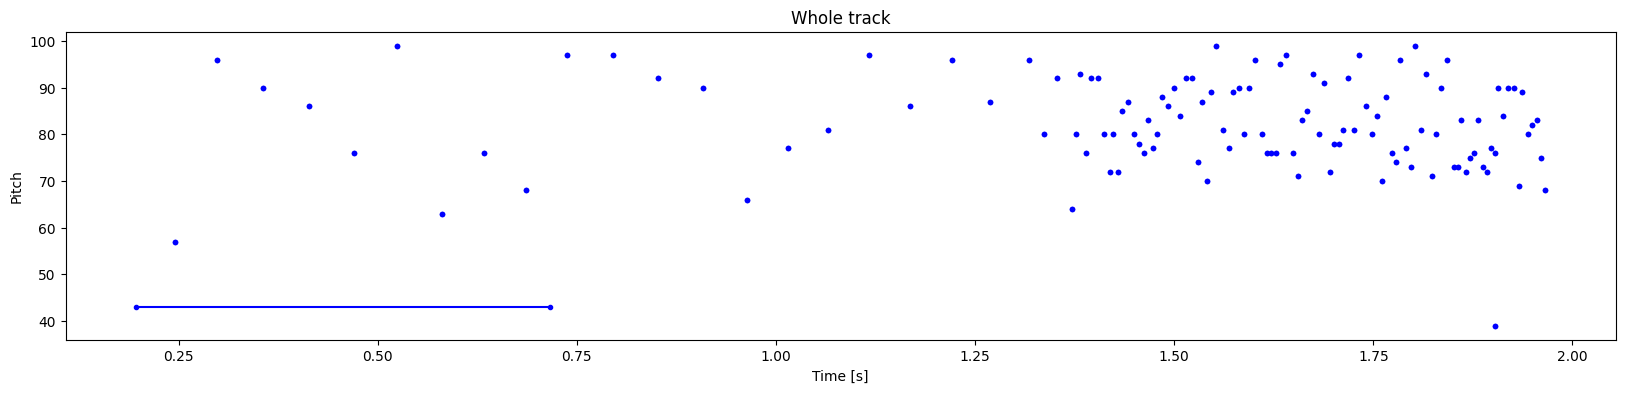

In [ ]:
plot_piano_roll(generated_notes)

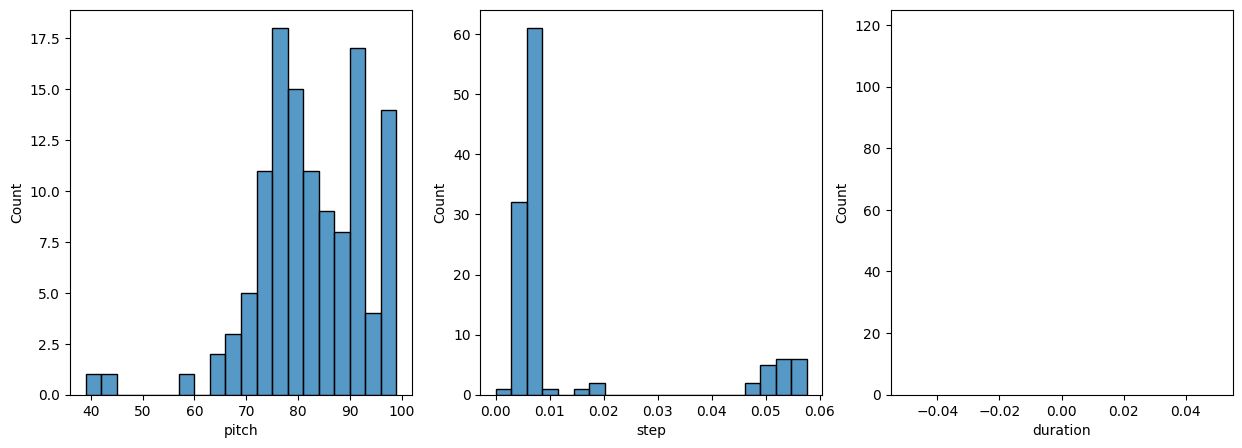

In [ ]:
plot_distributions(generated_notes)

***Generating 2nd Iteration i.e. Lyrics from the Melody ***

In [ ]:
import pandas as pd

# Specify the path to your Excel file
file_path = "/content/drive/MyDrive/april_capstone/notes_timing.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
df.head()

,Unnamed: 0,Unnamed: 0_x,msd_id,midi_id,match_score,midi_filename,lpd_filename,lyrics_filename,midi_end_time,midi_instruments,...,bpm,genre,lyric_lang,syl_by_measure,syl_count_by_measure,note_count_by_measure,measure_times,vocal_instrument_program,vocal_instrument_note_syl_corr,vocal_instrument_name
0,1.0,1.0,TRCMATQ128F92DB1E6,001784858d9e607c0db054e68cab8c6c,0.731268,processed/lmd_matched/001784858d9e607c0db054e6...,processed/lpd_5_matched/00056caa278e4192461ca4...,processed/lyrics/00056caa278e4192461ca42ddb952...,223.264160,10,...,84.204,blues,en-US,"[['of', 'war'], ['what', 'with', 'one', 'thing...","[2, 8, 5, 5, 8, 9, 5, 10, 9, 5, 10, 8, 6, 5, 8...","[0, 7, 4, 4, 7, 8, 4, 9, 8, 4, 9, 7, 5, 4, 7, ...","[5.83079015625, 5.83079015625, 12.050299656249...",99.0,1.0,FX 4 (atmosphere)
1,2.0,2.0,TRMFCDV128F1476197,0018190e20adfa537cc26bbc44c90e25,0.593737,processed/lmd_matched/0018190e20adfa537cc26bbc...,processed/lpd_5_matched/001784858d9e607c0db054...,processed/lyrics/001784858d9e607c0db054e68cab8...,202.187948,15,...,88.114,hip hop & rap,en-US,"[['yes', 'ter', 'day', 'when', 'i', 'was', 'yo...","[7, 12, 12, 12, 6, 6, 12, 12, 12, 7, 12, 12, 1...","[4, 11, 11, 11, 5, 5, 11, 11, 11, 6, 11, 11, 1...","[7.6666705, 10.666672, 16.000008, 21.333344, 2...",65.0,1.0,Alto Sax
2,3.0,3.0,TRWSHQO128F92CBE1F,001d789d86a9139c710af589a7a5f134,0.695430,processed/lmd_matched/001d789d86a9139c710af589...,processed/lpd_5_matched/0018190e20adfa537cc26b...,processed/lyrics/0018190e20adfa537cc26bbc44c90...,230.296875,12,...,81.981,country,en-US,"[['put', 'your', 'sweet', 'lips', 'a', 'lit', ...","[12, 11, 9, 3, 9, 4, 11, 10, 8, 4, 4, 9, 9, 7,...","[9, 10, 8, 2, 8, 3, 10, 9, 7, 3, 3, 8, 8, 6, 8...","[13.2421875, 18.0234375, 27.015625, 34.2890625...",24.0,1.0,Acoustic Guitar (nylon)
3,4.0,4.0,TRVAKNT12903CDE0DD,00229370562be516f2aecf7fe5e17449,0.522734,processed/lmd_matched/00229370562be516f2aecf7f...,processed/lpd_5_matched/001d789d86a9139c710af5...,processed/lyrics/001d789d86a9139c710af589a7a5f...,297.819199,13,...,88.338,country,en-US,"[['you', 'sigh'], ['the', 'song', 'be', 'gins'...","[2, 4, 2, 6, 3, 6, 5, 3, 3, 6, 4, 6, 6, 7, 3, ...","[0, 3, 1, 5, 2, 5, 4, 2, 2, 5, 3, 5, 5, 6, 2, ...","[14.76885144166667, 14.76885144166667, 16.0744...",56.0,1.0,Trumpet
4,5.0,5.0,TRGGGEH12903C9A457,00263b5a69674d9f89df481f4253772a,0.737199,processed/lmd_matched/00263b5a69674d9f89df481f...,processed/lpd_5_matched/00229370562be516f2aecf...,processed/lyrics/00229370562be516f2aecf7fe5e17...,363.067589,18,...,90.225,blues,en-US,"[[""we're"", 'an', 'oy', 'ster', 'cra', 'cker'],...","[6, 3, 7, 5, 4, 5, 4, 5, 7, 5, 4, 8, 5, 4, 6, ...","[3, 2, 6, 4, 3, 4, 3, 4, 6, 4, 3, 7, 4, 3, 5, ...","[23.733309600000002, 25.73886315, 27.741638925...",65.0,1.0,Alto Sax


In [ ]:
import pandas as pd

# Assuming 'df' is your pandas dataframe
first_row = df.iloc[0]

# To display the full content of the first row without truncation
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Automatically detect the display width
pd.set_option('display.max_colwidth', None)
print(first_row)


Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
df['lyrics'][0]

'Goodbye Norma Jean\n Though I never knew you at all\n You had the grace to hold yourself\n While those around you crawled\n They crawled out of the woodwork\n And they whispered into your brain\n They set you on the treadmill\n And they made you change your name\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long before\n Your legend ever did\n Loneliness was tough\n The toughest role you ever played\n Hollywood created a superstar\n And pain was the price you paid\n Even when you died\n Oh the press still hounded you\n All the papers had to say\n Was that Marilyn was found in the nude\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long before\n Your 

In [ ]:
df['syl_by_measure'][0]

'[[\'of\', \'war\'], [\'what\', \'with\', \'one\', \'thing\', \'and\', \'an\', \'oth\', \'er\'], ["it\'s", \'a\', \'tug\', \'of\', \'war\'], [\'we\', \'ex\', \'pect\', \'ed\', \'more\'], [\'but\', \'with\', \'one\', \'thing\', \'and\', \'an\', \'oth\', \'er\'], [\'we\', \'were\', \'trying\', \'to\', \'out\', \'do\', \'each\', \'oth\', \'er\'], [\'in\', \'a\', \'tug\', \'of\', \'war\'], [\'in\', \'an\', \'oth\', \'er\', \'world\', \'in\', \'an\', \'oth\', \'er\', \'world\'], [\'we\', \'could\', \'stand\', \'on\', \'top\', \'of\', \'the\', \'moun\', \'tain\'], [\'with\', \'our\', \'flag\', \'un\', \'furled\'], [\'in\', \'a\', \'time\', \'to\', \'come\', \'in\', \'a\', \'time\', \'to\', \'come\'], [\'we\', \'will\', \'be\', \'danc\', \'ing\', \'to\', \'the\', \'beat\'], [\'played\', \'on\', \'a\', \'dif\', \'ferent\', \'drum\'], ["it\'s", \'a\', \'tug\', \'of\', \'war\'], [\'though\', \'i\', \'know\', \'i\', \'must\', "n\'t", \'grum\', \'ble\'], ["it\'s", \'a\', \'tug\', \'of\', \'war\'],

In [ ]:
df['syl_by_measure'][0]

In [ ]:
df_summaries = pd.read_csv("/content/drive/MyDrive/april_capstone/summaries_notes.csv")

In [ ]:
df_summaries.head(1)

Unnamed: 0.1  Unnamed: 0  Unnamed: 0_x              msd_id                           midi_id  \
0             0           0             0  TRZOILY128F933BD73  00056caa278e4192461ca42ddb952532   

   match_score                                               midi_filename  \
0       0.7514  processed/lmd_matched/00056caa278e4192461ca42ddb952532.mid   

                                                   lpd_filename  \
0  processed/lpd_5_matched/00056caa278e4192461ca42ddb952532.npz   

                                         lyrics_filename  midi_end_time  midi_instruments  \
0  processed/lyrics/00056caa278e4192461ca42ddb952532.npy      223.26416                10   

                     midi_program_numbers  lpd_resolution  lpd_tracks lpd_track_program_numbers  \
0  [0, 35, 0, 56, 25, 29, 52, 53, 25, 30]              24           5        [0, 0, 24, 32, 48]   

                lpd_track_lengths  lyrics_time_events  lyrics_max_track_length  \
0  [5736, 5736, 5736, 5736, 5736]                 367                     5736   

           song_title              artist  \
0  Candle In The Wind  Richard Clayderman   

                                                                                                                           artist_terms  \
0  ['instrumental pop', 'ballad', 'easy listening', 'chill-out', 'german pop', 'soft rock', 'pop', 'jazz', 'neoclassical', 'orchestra']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       lyrics  \
0  Goodbye Norma Jean\n Though I never knew you at all\n You had the grace to hold yourself\n While those around you crawled\n They crawled out of the woodwork\n And they whispered into your brain\n They set you on the treadmill\n And they made you change your name\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long before\n Your legend ever did\n Loneliness was tough\n The toughest role you ever played\n Hollywood created a superstar\n And pain was the price you paid\n Even when you died\n Oh the press still hounded you\n All the papers had to say\n Was that Marilyn was found in the nude\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long be

In [ ]:
df_summaries['lyrics'][0]

'Goodbye Norma Jean\n Though I never knew you at all\n You had the grace to hold yourself\n While those around you crawled\n They crawled out of the woodwork\n And they whispered into your brain\n They set you on the treadmill\n And they made you change your name\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long before\n Your legend ever did\n Loneliness was tough\n The toughest role you ever played\n Hollywood created a superstar\n And pain was the price you paid\n Even when you died\n Oh the press still hounded you\n All the papers had to say\n Was that Marilyn was found in the nude\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long before\n Your 

In [ ]:
df_summaries['syl_by_measure'][0]

"[['good', 'bye', 'nor', 'ma', 'jean'], ['though', 'i', 'ne', 'ver', 'knew', 'you', 'at', 'al', 'l'], ['you', 'had', 'the', 'grace', 'to', 'hold', 'your', 'self'], ['while', 'those', 'a', 'round', 'you', 'crawled'], ['they crawled', 'out', 'of the', 'wood', 'work'], ['and', 'they', 'whis', 'pered', 'in', 'to', 'your', 'bra', 'in'], ['they', 'set', 'you', 'on', 'the', 'tread', 'mill'], ['and', 'they', 'made', 'you', 'change', 'your', 'name'], ['and', 'it', 'seems', 'to', 'me', 'you', 'lived', 'your', 'li', 'fe'], ['like', 'a', 'cand', 'le', 'in', 'the', 'wind'], ['ne', 'ver', 'kno', 'wing', 'w', 'ho', 'to', 'cling', 'to'], ['when', 'the', 'rain', 'set', 'in'], ['and', 'i', 'would', 'have'], ['liked', 'to', 'have known', 'you'], ['but', 'i', 'was', 'just', 'a', 'kid'], ['your', 'cand', 'le', 'burned', 'out', 'long', 'be', 'fore'], ['your', 'le', 'gend', 'e', 'ver', 'did'], ['lone', 'li', 'ness', 'was', 'tough'], ['the tou', 'ghest', 'role', 'you', 'e', 'ver', 'play', 'ed'], ['hol', 'ly',

In [ ]:
df_summaries['syl_count_by_measure'][0]

'[5, 9, 8, 6, 5, 9, 7, 7, 10, 7, 9, 5, 4, 4, 6, 8, 6, 5, 8, 8, 8, 5, 9, 7, 9, 11, 7, 8, 5, 4, 4, 6, 8, 6, 6, 9, 10, 7, 5, 9, 5, 4, 10, 11, 7, 8, 5, 6, 2, 6, 7, 6, 8, 6]'

In [ ]:
df_summaries['note_durs_by_measure'][0]

'[[0.24658203125, 0.14892578125, 0.32958984375, 0.42236328125, 0.19287109375], [0.71044921875, 0.25634765625, 0.22705078125, 0.21240234375, 0.25146484375, 0.15869140625, 0.42724609375, 0.17333984375, 0.38330078125], [0.42724609375, 0.32470703125, 0.27099609375, 0.23193359375, 0.25146484375, 0.17333984375, 0.49072265625, 0.19287109375], [0.28564453125, 0.22705078125, 0.45654296875, 0.27587890625, 0.46142578125, 0.20263671875], [0.69091796875, 0.21240234375, 0.20263671875, 0.15380859375, 0.36376953125], [0.43212890625, 0.13427734375, 0.06591796875, 0.16357421875, 0.09521484375, 0.19775390625, 0.43212890625, 0.20751953125, 0.30029296875], [0.36376953125, 0.17333984375, 0.11474609375, 0.31982421875, 0.20263671875, 0.11474609375, 0.28564453125], [0.41748046875, 0.10498046875, 0.11962890625, 0.39794921875, 0.11962890625, 0.37841796875, 0.11962890625], [0.70556640625, 0.16845703125, 0.23193359375, 0.29541015625, 0.12451171875, 0.29541015625, 0.16845703125, 0.21728515625, 0.18310546875, 0.3735

In [ ]:
df_summaries['note_pitches_by_measure'][0]

'[[56, 56, 56, 56, 54], [56, 52, 54, 56, 52, 61, 61, 62, 61], [59, 59, 61, 59, 61, 59, 59, 52], [52, 56, 57, 56, 54, 56], [49, 52, 54, 56, 59], [59, 52, 54, 56, 52, 61, 61, 62, 61], [59, 59, 61, 61, 61, 59, 59], [52, 56, 56, 57, 56, 54, 56], [49, 56, 57, 59, 59, 59, 56, 59, 59, 59], [56, 56, 57, 59, 59, 59, 61], [52, 56, 57, 59, 59, 59, 59, 59, 61], [59, 57, 56, 56, 54], [54, 59, 59, 61], [61, 61, 63, 64], [63, 63, 61, 59, 61, 61], [56, 56, 56, 56, 57, 59, 56, 54], [54, 47, 49, 52, 52, 54], [49, 56, 56, 56, 54], [56, 52, 54, 56, 52, 61, 62, 61], [59, 59, 59, 61, 61, 59, 59], [52, 52, 52, 57, 56, 56, 54, 54, 52, 54], [49, 52, 54, 56, 57], [59, 57, 59, 61, 61, 61, 62, 62, 61], [59, 59, 59, 61, 61, 59], [56, 52, 56, 56, 57, 56, 54, 52, 54], [52, 49, 56, 56, 59, 59, 59, 56, 59, 59, 61], [59, 56, 56, 57, 59, 59, 59, 56, 61], [52, 56, 57, 59, 59, 59, 59, 61], [59, 57, 56, 56, 54], [54, 59, 59, 61], [61, 61, 63, 64], [63, 63, 61, 59, 61, 61], [56, 52, 56, 56, 57, 59, 56, 54], [54, 47, 49, 52,

In [ ]:
df_summaries['note_velocities_by_measure'][0]

'[[103, 103, 107, 101, 90], [92, 126, 127, 111, 114, 112, 112, 113, 106], [109, 109, 112, 98, 101, 100, 113, 97], [89, 97, 99, 101, 105, 97], [113, 114, 120, 120, 120], [125, 127, 121, 127, 123, 127, 123, 115, 110], [118, 104, 114, 123, 120, 113, 120], [98, 107, 113, 114, 114, 113, 117], [105, 127, 119, 127, 96, 127, 109, 125, 116, 119], [127, 126, 100, 113, 96, 110, 110], [104, 127, 115, 126, 108, 108, 123, 112, 127], [127, 118, 123, 126, 118], [117, 127, 114, 127], [88, 127, 123, 127], [123, 113, 116, 107, 121, 113], [126, 109, 127, 109, 118, 120, 117, 96], [110, 105, 113, 107, 109, 109], [107, 127, 90, 124, 104], [117, 127, 124, 127, 119, 126, 115, 124], [112, 108, 113, 113, 111, 105, 104], [91, 106, 105, 118, 104, 105, 112, 112, 104, 100], [113, 127, 126, 125, 125], [122, 127, 126, 127, 127, 127, 122, 118, 118], [127, 120, 127, 123, 124, 120], [126, 124, 123, 126, 122, 117, 120, 118, 117], [116, 127, 127, 119, 127, 127, 127, 117, 127, 125, 127], [124, 120, 116, 124, 127, 127, 120, 

In [ ]:
df_summaries['note_stresses_by_measure'][0]

'[[1, 1, 1, 1, 0], [0, 2, 2, 2, 2, 2, 2, 2, 1], [1, 1, 2, 1, 1, 1, 2, 1], [0, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 1], [2, 1, 2, 2, 2, 2, 2], [1, 1, 2, 2, 2, 2, 2], [1, 2, 2, 2, 1, 2, 1, 2, 2, 2], [2, 2, 1, 2, 1, 1, 1], [1, 2, 2, 2, 1, 1, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2], [0, 2, 2, 2], [2, 2, 2, 1, 2, 2], [2, 1, 2, 1, 2, 2, 2, 1], [1, 1, 2, 1, 1, 1], [1, 2, 0, 2, 1], [2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 1, 1], [0, 1, 1, 2, 1, 1, 2, 2, 1, 1], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 0, 2], [2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2], [1, 2, 1, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 1, 2, 2, 1, 2], [2, 2, 2, 1, 2, 2], [0, 1, 2, 2, 2, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 

In [ ]:
df_summaries['measure_times'][0]

'[11.2548828125, 12.59033203125, 16.41845703125, 19.41162109375, 21.90185546875, 26.2548828125, 31.40869140625, 33.759765625, 36.85791015625, 43.88427734375, 46.25244140625, 50.73974609375, 52.87353515625, 56.25244140625, 57.8955078125, 60.39794921875, 64.26513671875, 66.5673828125, 81.92138671875, 86.13037109375, 88.39599609375, 91.73583984375, 95.39306640625, 100.7861328125, 103.1298828125, 106.8798828125, 113.3203125, 115.5517578125, 120.04638671875, 122.11181640625, 125.76904296875, 127.37060546875, 129.74365234375, 133.61083984375, 135.80078125, 151.6455078125, 155.1708984375, 157.99560546875, 160.5517578125, 166.1767578125, 170.62744140625, 171.79931640625, 172.97119140625, 176.2548828125, 182.61474609375, 184.92431640625, 189.3896484375, 191.52587890625, 195.9423828125, 196.64306640625, 199.22119140625, 203.01025390625, 205.31494140625, 212.3486328125, 214.6923828125]'

In [ ]:
df_summaries['lyric_summary_bart'][0]

'Goodbye Norma Jean. Though I never knew you at all. You had the grace to hold yourself. While those around you crawled'

In [ ]:
df_summaries['msd_id'][0]

'TRZOILY128F933BD73'

In [ ]:
len(df_summaries['syl_count_by_measure'][0])

167

In [ ]:
len(df_summaries['syl_by_measure'][0])

2784

In [ ]:
type(df_summaries['syl_count_by_measure'][0])

str

In [ ]:
type(syl_count_by_measure)

list

In [ ]:
import ast  # Module to safely evaluate strings containing Python literals

# Assume df_summaries['syl_count_by_measure'][0] contains the string representation of the list
syl_count_by_measure_str = df_summaries['syl_count_by_measure'][0]

# Safely convert string to list
syl_count_by_measure = ast.literal_eval(syl_count_by_measure_str)

# Get the length of the list
length_of_syl_count = len(syl_count_by_measure)
length_of_syl_count

54

In [ ]:
len(ast.literal_eval(df_summaries['syl_by_measure'][0]))

54

In [ ]:
df_summaries = pd.read_csv("/content/drive/MyDrive/april_capstone/summaries_notes.csv")

In [ ]:
df_summaries.head(1)

Unnamed: 0.1  Unnamed: 0  Unnamed: 0_x              msd_id                           midi_id  \
0             0           0             0  TRZOILY128F933BD73  00056caa278e4192461ca42ddb952532   

   match_score                                               midi_filename  \
0       0.7514  processed/lmd_matched/00056caa278e4192461ca42ddb952532.mid   

                                                   lpd_filename  \
0  processed/lpd_5_matched/00056caa278e4192461ca42ddb952532.npz   

                                         lyrics_filename  midi_end_time  midi_instruments  \
0  processed/lyrics/00056caa278e4192461ca42ddb952532.npy      223.26416                10   

                     midi_program_numbers  lpd_resolution  lpd_tracks lpd_track_program_numbers  \
0  [0, 35, 0, 56, 25, 29, 52, 53, 25, 30]              24           5        [0, 0, 24, 32, 48]   

                lpd_track_lengths  lyrics_time_events  lyrics_max_track_length  \
0  [5736, 5736, 5736, 5736, 5736]                 367                     5736   

           song_title              artist  \
0  Candle In The Wind  Richard Clayderman   

                                                                                                                           artist_terms  \
0  ['instrumental pop', 'ballad', 'easy listening', 'chill-out', 'german pop', 'soft rock', 'pop', 'jazz', 'neoclassical', 'orchestra']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       lyrics  \
0  Goodbye Norma Jean\n Though I never knew you at all\n You had the grace to hold yourself\n While those around you crawled\n They crawled out of the woodwork\n And they whispered into your brain\n They set you on the treadmill\n And they made you change your name\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long before\n Your legend ever did\n Loneliness was tough\n The toughest role you ever played\n Hollywood created a superstar\n And pain was the price you paid\n Even when you died\n Oh the press still hounded you\n All the papers had to say\n Was that Marilyn was found in the nude\n And it seems to me you lived your life\n Like a candle in the wind\n Never knowing who to cling to\n When the rain set in\n And I would have\n liked to have known you\n But I was just a kid\n Your candle burned out long be

In [ ]:
df_summaries['note_pitches_by_measure'][0]

'[[56, 56, 56, 56, 54], [56, 52, 54, 56, 52, 61, 61, 62, 61], [59, 59, 61, 59, 61, 59, 59, 52], [52, 56, 57, 56, 54, 56], [49, 52, 54, 56, 59], [59, 52, 54, 56, 52, 61, 61, 62, 61], [59, 59, 61, 61, 61, 59, 59], [52, 56, 56, 57, 56, 54, 56], [49, 56, 57, 59, 59, 59, 56, 59, 59, 59], [56, 56, 57, 59, 59, 59, 61], [52, 56, 57, 59, 59, 59, 59, 59, 61], [59, 57, 56, 56, 54], [54, 59, 59, 61], [61, 61, 63, 64], [63, 63, 61, 59, 61, 61], [56, 56, 56, 56, 57, 59, 56, 54], [54, 47, 49, 52, 52, 54], [49, 56, 56, 56, 54], [56, 52, 54, 56, 52, 61, 62, 61], [59, 59, 59, 61, 61, 59, 59], [52, 52, 52, 57, 56, 56, 54, 54, 52, 54], [49, 52, 54, 56, 57], [59, 57, 59, 61, 61, 61, 62, 62, 61], [59, 59, 59, 61, 61, 59], [56, 52, 56, 56, 57, 56, 54, 52, 54], [52, 49, 56, 56, 59, 59, 59, 56, 59, 59, 61], [59, 56, 56, 57, 59, 59, 59, 56, 61], [52, 56, 57, 59, 59, 59, 59, 61], [59, 57, 56, 56, 54], [54, 59, 59, 61], [61, 61, 63, 64], [63, 63, 61, 59, 61, 61], [56, 52, 56, 56, 57, 59, 56, 54], [54, 47, 49, 52,

In [ ]:
df_summaries.head(0)

,Unnamed: 0.1,Unnamed: 0,Unnamed: 0_x,msd_id,midi_id,match_score,midi_filename,lpd_filename,lyrics_filename,midi_end_time,midi_instruments,midi_program_numbers,lpd_resolution,lpd_tracks,lpd_track_program_numbers,lpd_track_lengths,lyrics_time_events,lyrics_max_track_length,song_title,artist,artist_terms,lyrics,album,year_released,bpm,genre,lyric_lang,syl_by_measure,syl_count_by_measure,note_count_by_measure,measure_times,vocal_instrument_program,vocal_instrument_note_syl_corr,vocal_instrument_name,note_onsets_by_measure,note_durs_by_measure,note_pitches_by_measure,note_velocities_by_measure,note_stresses_by_measure,lyric_summary_bart


In [ ]:
type(df_summaries['msd_id'][0])

str

In [ ]:
type(print(df_summaries['msd_id'][0]))

TRZOILY128F933BD73


NoneType

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Concatenate, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set parameters for embedding
embedding_dim_genre = 8  # Embedding size for genres
vocab_size = 1000  # Vocabulary size for lyrics
num_genre_classes = len(df_summary['genre'].unique())  # Number of unique genres

# Assuming df_summary is your DataFrame and each row is a song
song_id = df_summaries['msd_id'][0]  # We'll just use the first song for this example

# Extracting melody features for the song
pitches = np.array(df_summary.iloc[0, df_summary.columns.get_loc('note_pitches_by_measure')])
# pitches = np.array(df_summary.loc[song_id, 'note_pitches_by_measure'])

durations = np.array(df_summary.iloc[0, df_summary.columns.get_loc('note_durs_by_measure')])
velocities = np.array(df_summary.iloc[0, df_summary.columns.get_loc('note_velocities_by_measure')])
syllable_counts = np.array(df_summary.iloc[0, df_summary.columns.get_loc('syl_count_by_measure')])

In [ ]:
df_summary['genre'][0]

'jazz'

In [ ]:
# Tokenize genre
genre_tokenizer = Tokenizer()
genre_tokenizer.fit_on_texts(df_summary['genre'][0])
genre_index = genre_tokenizer.word_index

In [ ]:
genre_index

{'z': 1, 'j': 2, 'a': 3}

In [ ]:


genre = df_summary.iloc[0, df_summary.columns.get_loc('genre')]

genre_id = genre_tokenizer.texts_to_sequences([genre])
genre_input_value = pad_sequences(genre_id, maxlen=1)  # Shape (1, 1)

In [ ]:
genre_input_value

array([[0]], dtype=int32)

In [ ]:
lyrics = df_summary.iloc[0 , df_summary.columns.get_loc('syl_by_measure')]  # This should be a string of lyrics for the song
lyrics

"[['good', 'bye', 'nor', 'ma', 'jean'], ['though', 'i', 'ne', 'ver', 'knew', 'you', 'at', 'al', 'l'], ['you', 'had', 'the', 'grace', 'to', 'hold', 'your', 'self'], ['while', 'those', 'a', 'round', 'you', 'crawled'], ['they crawled', 'out', 'of the', 'wood', 'work'], ['and', 'they', 'whis', 'pered', 'in', 'to', 'your', 'bra', 'in'], ['they', 'set', 'you', 'on', 'the', 'tread', 'mill'], ['and', 'they', 'made', 'you', 'change', 'your', 'name'], ['and', 'it', 'seems', 'to', 'me', 'you', 'lived', 'your', 'li', 'fe'], ['like', 'a', 'cand', 'le', 'in', 'the', 'wind'], ['ne', 'ver', 'kno', 'wing', 'w', 'ho', 'to', 'cling', 'to'], ['when', 'the', 'rain', 'set', 'in'], ['and', 'i', 'would', 'have'], ['liked', 'to', 'have known', 'you'], ['but', 'i', 'was', 'just', 'a', 'kid'], ['your', 'cand', 'le', 'burned', 'out', 'long', 'be', 'fore'], ['your', 'le', 'gend', 'e', 'ver', 'did'], ['lone', 'li', 'ness', 'was', 'tough'], ['the tou', 'ghest', 'role', 'you', 'e', 'ver', 'play', 'ed'], ['hol', 'ly',

In [ ]:
lyrics_tokenizer = Tokenizer(num_words=vocab_size)
lyrics_tokenizer

In [ ]:
lyrics_tokenizer.fit_on_texts([lyrics])

In [ ]:
lyrics_sequences = lyrics_tokenizer.texts_to_sequences([lyrics])
len(lyrics_sequences[0])

379

In [ ]:
pitches.shape

()

In [ ]:
# lyrics_vector = pad_sequences(lyrics_sequences, maxlen=pitches.shape[0])

In [ ]:
# Preprocess lyrics 2nd Time

lyrics = df_summary.iloc[0, df_summary.columns.get_loc('syl_by_measure')]  # This should be a string of lyrics for the song
lyrics_tokenizer = Tokenizer(num_words=vocab_size)
lyrics_tokenizer.fit_on_texts([lyrics])


In [ ]:
lyrics

"[['good', 'bye', 'nor', 'ma', 'jean'], ['though', 'i', 'ne', 'ver', 'knew', 'you', 'at', 'al', 'l'], ['you', 'had', 'the', 'grace', 'to', 'hold', 'your', 'self'], ['while', 'those', 'a', 'round', 'you', 'crawled'], ['they crawled', 'out', 'of the', 'wood', 'work'], ['and', 'they', 'whis', 'pered', 'in', 'to', 'your', 'bra', 'in'], ['they', 'set', 'you', 'on', 'the', 'tread', 'mill'], ['and', 'they', 'made', 'you', 'change', 'your', 'name'], ['and', 'it', 'seems', 'to', 'me', 'you', 'lived', 'your', 'li', 'fe'], ['like', 'a', 'cand', 'le', 'in', 'the', 'wind'], ['ne', 'ver', 'kno', 'wing', 'w', 'ho', 'to', 'cling', 'to'], ['when', 'the', 'rain', 'set', 'in'], ['and', 'i', 'would', 'have'], ['liked', 'to', 'have known', 'you'], ['but', 'i', 'was', 'just', 'a', 'kid'], ['your', 'cand', 'le', 'burned', 'out', 'long', 'be', 'fore'], ['your', 'le', 'gend', 'e', 'ver', 'did'], ['lone', 'li', 'ness', 'was', 'tough'], ['the tou', 'ghest', 'role', 'you', 'e', 'ver', 'play', 'ed'], ['hol', 'ly',

In [ ]:
len(lyrics)

2784

In [ ]:

lyrics_sequences = lyrics_tokenizer.texts_to_sequences([lyrics])
len(lyrics_sequences[0])

379

In [ ]:
# Reshape the melody features to add a sequence dimension
melody_features = np.stack((pitches, durations, velocities), axis=-1)
melody_features = melody_features.reshape(1, -1, 3)  # Shape (1, num_measures, 3)

# Define LSTM model with genre embedding
melody_input = Input(shape=(None, 3))  # None for variable sequence length, 3 for pitch, duration, velocity
genre_input = Input(shape=(1,))  # Just a single integer for genre
genre_embedding = Embedding(input_dim=num_genre_classes + 1, output_dim=embedding_dim_genre)(genre_input)
genre_embedding = Dense(32, activation='relu')(genre_embedding)  # Process the genre embedding

lstm_layer = LSTM(128)(melody_input)
concat_layer = Concatenate()([lstm_layer, genre_embedding])
lyrics_output = Dense(vocab_size, activation='softmax', name='lyrics_output')(concat_layer)
syllable_count_output = Dense(1, name='syllable_count_output')(concat_layer)

# Assemble the model
model = Model(inputs=[melody_input, genre_input], outputs=[lyrics_output, syllable_count_output])
model.compile(optimizer='adam',
              loss={'lyrics_output': 'categorical_crossentropy', 'syllable_count_output': 'mse'},
              metrics={'lyrics_output': 'accuracy'})

# Train the model on the single song
model.fit([melody_features, genre_input_value], [lyrics_vector, syllable_counts.reshape(1, -1, 1)], epochs=10)


**DATA**

Input = pitch, duration, velocity , genre
Output = lyrics , syllable count by measure



lyrics = [['good', 'bye', 'nor', 'ma', 'jean'], ['though', 'i', 'ne', 'ver', 'knew', 'you', 'at', 'al', 'l'], ['you', 'had', 'the', 'grace', 'to', 'hold', 'your', 'self']]

Pitch = [[56, 56, 56, 56, 54], [56, 52, 54, 56, 52, 61, 61, 62, 61], [59, 59, 61, 59, 61, 59, 59, 52]]

Velocity = [[103, 103, 107, 101, 90], [92, 126, 127, 111, 114, 112, 112, 113, 106], [109, 109, 112, 98, 101, 100, 113, 97]]

Duration = [[0.24658203125, 0.14892578125, 0.32958984375, 0.42236328125, 0.19287109375], [0.71044921875, 0.25634765625, 0.22705078125, 0.21240234375, 0.25146484375, 0.15869140625, 0.42724609375, 0.17333984375, 0.38330078125], [0.42724609375, 0.32470703125, 0.27099609375, 0.23193359375, 0.25146484375, 0.17333984375, 0.49072265625, 0.19287109375]]

Syllable count by measure = [5, 9, 8]

genre = blues

In [ ]:
lyrics = [['good', 'bye', 'nor', 'ma', 'jean'], ['though', 'i', 'ne', 'ver', 'knew', 'you', 'at', 'al', 'l'], ['you', 'had', 'the', 'grace', 'to', 'hold', 'your', 'self']]

pitch = [[56, 56, 56, 56, 54], [56, 52, 54, 56, 52, 61, 61, 62, 61], [59, 59, 61, 59, 61, 59, 59, 52]]

velocity = [[103, 103, 107, 101, 90], [92, 126, 127, 111, 114, 112, 112, 113, 106], [109, 109, 112, 98, 101, 100, 113, 97]]

duration = [[0.24658203125, 0.14892578125, 0.32958984375, 0.42236328125, 0.19287109375], [0.71044921875, 0.25634765625, 0.22705078125, 0.21240234375, 0.25146484375, 0.15869140625, 0.42724609375, 0.17333984375, 0.38330078125], [0.42724609375, 0.32470703125, 0.27099609375, 0.23193359375, 0.25146484375, 0.17333984375, 0.49072265625, 0.19287109375]]

syllable_count_by_measure = [5, 9, 8]

genre = 'blues'

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Embedding, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example sizes, you need to adjust these according to your actual dataset
vocab_size = 10000  # Size of your lyrics vocabulary
genre_vocab_size = 10  # Number of genres you have
embedding_dim_lyrics = 50  # Size of the lyrics embedding
embedding_dim_genre = 5  # Size of the genre embedding
max_lyrics_length = 100  # The maximum length of a lyrics sequence
max_measures = 50  # The maximum number of measures in your data

# Create the tokenizer for the lyrics
lyrics_tokenizer = Tokenizer(num_words=vocab_size)
lyrics_tokenizer.fit_on_texts(lyrics)
lyrics_sequences = lyrics_tokenizer.texts_to_sequences(lyrics)
lyrics_padded = pad_sequences(lyrics_sequences, maxlen=max_lyrics_length, padding='post')

# Tokenize and pad genres
genre_tokenizer = Tokenizer(num_words=genre_vocab_size)
genre_tokenizer.fit_on_texts([genre])
genre_sequences = genre_tokenizer.texts_to_sequences([genre])
genre_padded = pad_sequences(genre_sequences, maxlen=1)



In [ ]:
pitch
pitches_padded = pad_sequences(pitch, padding='post', maxlen=None)  # 'maxlen=None' pads to the longest sequence
pitches_padded
pitch_input = np.expand_dims(pitches_padded, axis=0)
pitch_input
pitch_input = np.array(pitch_input)
pitch_input

array([[[56, 56, 56, 56, 54,  0,  0,  0,  0],
        [56, 52, 54, 56, 52, 61, 61, 62, 61],
        [59, 59, 61, 59, 61, 59, 59, 52,  0]]], dtype=int32)

In [ ]:
max_length = max(len(lst) for lst in duration)

# Pad the sublists with zeros to make them all the same length
duration_padded = [lst + [0]*(max_length - len(lst)) for lst in duration]

# Convert the padded list to a numpy array
duration_input = np.array(duration_padded)
duration_input

array([[0.24658203, 0.14892578, 0.32958984, 0.42236328, 0.19287109,
        0.        , 0.        , 0.        , 0.        ],
       [0.71044922, 0.25634766, 0.22705078, 0.21240234, 0.25146484,
        0.15869141, 0.42724609, 0.17333984, 0.38330078],
       [0.42724609, 0.32470703, 0.27099609, 0.23193359, 0.25146484,
        0.17333984, 0.49072266, 0.19287109, 0.        ]])

In [ ]:
max_length = max(len(lst) for lst in velocity)

# Pad the sublists with a placeholder value (e.g., 0 for velocity) to make them all the same length
velocity_padded = [lst + [0]*(max_length - len(lst)) for lst in velocity]

# Convert the padded list to a numpy array
velocity_input = np.array(velocity_padded)
velocity_input


array([[103, 103, 107, 101,  90,   0,   0,   0,   0],
       [ 92, 126, 127, 111, 114, 112, 112, 113, 106],
       [109, 109, 112,  98, 101, 100, 113,  97,   0]])

In [ ]:
velocity_input.shape

(3, 9)

In [ ]:
# Assume pitches, durations, velocities are already numpy arrays of shape (num_samples, max_measures)
# Normalize your numerical inputs
# pitch_input = np.array(pitch) / 128.0
# duration_input = np.array(duration)
# velocity_input = np.array(velocity) / 128.0

In [ ]:
max_measures

50

In [ ]:

# Construct the LSTM model
melody_input = Input(shape=(max_measures, 3))  # for pitch, duration, velocity
# genre_input = Input(shape=(1,))  # for genre
# lyrics_input = Input(shape=(max_lyrics_length,))  # for lyrics


In [ ]:
melody_input

<KerasTensor: shape=(None, 50, 3) dtype=float32 (created by layer 'input_8')>

In [ ]:
import tensorflow as tf
padding = [[0, 0], [0, 50], [0, 0]]  # No padding for batch dimension or feature dimension

# Apply padding
melody_input_padded = tf.pad(melody_input, paddings=padding)
melody_input_padded

<KerasTensor: shape=(None, 100, 3) dtype=float32 (created by layer 'tf.compat.v1.pad_2')>

In [ ]:
# lyrics_input

In [ ]:
genre_input = Input(shape=(1,))  # for genre
genre_input

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_10')>

In [ ]:

genre_input

# Embedding layers
genre_embedding = Embedding(input_dim=genre_vocab_size, output_dim=embedding_dim_genre)(genre_input)
genre_embedding


<KerasTensor: shape=(None, 1, 5) dtype=float32 (created by layer 'embedding_3')>

In [ ]:
from tensorflow.keras.layers import RepeatVector

# Flatten the embeddings
genre_embedding_flat = Dense(32, activation='relu')(genre_embedding)
genre_embedding_flat



<KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'dense')>

In [ ]:
import tensorflow as tf
padding = [[0, 0], [0, 99], [0, 0]]  # No padding for batch dimension or feature dimension

# Apply padding
genre_embedding_padded = tf.pad(genre_embedding_flat, paddings=padding)
genre_embedding_padded

<KerasTensor: shape=(None, 100, 32) dtype=float32 (created by layer 'tf.compat.v1.pad_3')>

In [ ]:
lyrics_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim_lyrics)(lyrics_input)
lyrics_embedding

<KerasTensor: shape=(None, 100, 50) dtype=float32 (created by layer 'embedding_4')>

In [ ]:
# lyrics_embedding_flat = Dense(32, activation='relu')(lyrics_embedding)
# lyrics_embedding_flat

In [ ]:
# Concatenate numerical input with flattened embeddings
combined_input = concatenate([melody_input_padded, genre_embedding_padded]) #, lyrics_embedding_flat])
combined_input

<KerasTensor: shape=(None, 100, 35) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
# Concatenate numerical input with flattened embeddings
# combined_input = concatenate([melody_input, genre_embedding_flat, lyrics_embedding_flat])
# combined_input

In [ ]:
# LSTM layer
lstm_output = LSTM(128)(combined_input)

In [ ]:
lstm_output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'lstm_2')>

In [ ]:

# Prediction layers
lyrics_prediction = Dense(vocab_size, activation='softmax', name='lyrics_output')(lstm_output)
# syllable_count_prediction = Dense(1, name='syllable_count_output')(lstm_output)

In [ ]:
lyrics_prediction.shape


TensorShape([None, 128])

In [ ]:
# Create the model
model = Model(inputs= combined_input, outputs=[lyrics_prediction])
model.compile(optimizer='adam', loss={'lyrics_output': 'sparse_categorical_crossentropy'}, metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100, 35)]         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               83968     
                                                                 
 lyrics_output (Dense)       (None, 128)               16512     
                                                                 
Total params: 100480 (392.50 KB)
Trainable params: 100480 (392.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(combined_input, [lyrics_prediction], epochs=10)

In [ ]:
# Create the model
# model = Model(inputs=[melody_input, genre_input, lyrics_input], outputs=[lyrics_prediction, syllable_count_prediction])
# model.compile(optimizer='adam', loss={'lyrics_output': 'sparse_categorical_crossentropy', 'syllable_count_output': 'mean_squared_error'}, metrics=['accuracy'])


In [ ]:
# model.summary()

In [ ]:
# Check the shapes of the inputs
print(f"melody_input_padded.shape: {melody_input_padded.shape}")
print(f"genre_embedding_padded.shape: {genre_embedding_padded.shape}")
#print(f"lyrics_padded.shape: {lyrics_padded.shape}")

melody_input_padded.shape: (None, 100, 3)
genre_embedding_padded.shape: (None, 100, 32)


In [ ]:
lyrics_padded = lyrics_padded.reshape(3, 100, 1)


In [ ]:
model.fit([melody_input_padded,  genre_embedding_padded], [lyrics_prediction], epochs=10)

In [ ]:
melody_input_padded.shape

TensorShape([None, 100, 3])

In [ ]:
genre_embedding_padded.shape

TensorShape([None, 100, 32])

In [ ]:
lyrics_prediction.shape

TensorShape([None, 10000])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 5)                 50        ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 50, 3)]              0         []                            
                                                                                            